### In this exercise spreadsheet, we study point estimates. That is, we have data $y$ and a model $f(\theta)$, and we want an estimate of $\theta$, denoted by $\hat{\theta}$.

### Example

Estimating the mean of independent measurements when the data points have different error bars (technical term: the data are heteroskedastic)

First step: generate the error bars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N = 10
mean_error = 1 #Mean value of the error bars
mu = 0.3
errors_sigma = mean_error*np.random.random(N)#np.random.chisquare(4,size=N)/4 #Generage values of the error bars

Second step: generate mock data

Text(0.5, 0.98, 'Measurements')

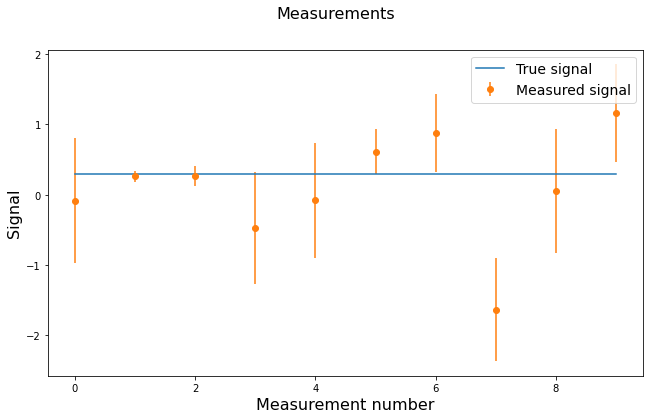

In [2]:
noise = errors_sigma*np.random.randn(N)
signal_pl = mu*np.ones(N)
y_pl =  signal_pl + noise #Generated data

#Plot the mock data
abscissa = np.arange(N)
plt.figure(figsize=(16/1.5,9/1.5))
plt.plot(abscissa, signal_pl, label='True signal')
plt.errorbar(abscissa, y_pl, yerr=errors_sigma, label='Measured signal',fmt='o')
plt.legend(fontsize = 14)
plt.xlabel('Measurement number', fontsize=16)
plt.ylabel('Signal', fontsize=16)
plt.suptitle('Measurements', fontsize=16)

The estimate of the mean is $$\hat{\mu} =\frac{\sum\limits_{k=1}^N \frac{y_k }{\sigma_k^2}}{\sum\limits_{k=1}^N \frac{1 }{\sigma_k^2} }.$$ Now we compute the parameter estimate and plot its value 

In [3]:
hat_mu = np.sum(y_pl/errors_sigma**2) / np.sum(1/errors_sigma**2)

Text(0.5, 0, 'Time')

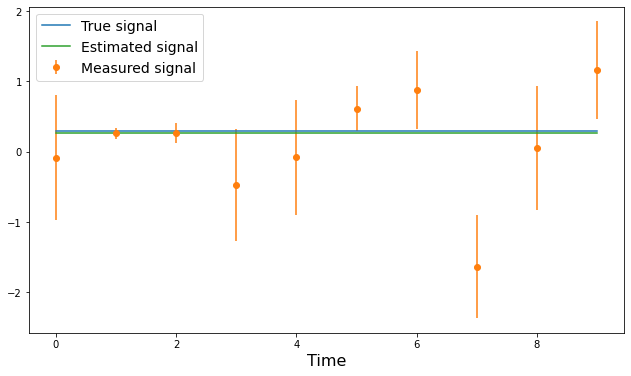

In [4]:
plt.figure(figsize=(16/1.5,9/1.5))
plt.plot(abscissa, signal_pl, label='True signal')
plt.errorbar(abscissa, y_pl, yerr=errors_sigma, label='Measured signal',fmt='o')
plt.plot(abscissa, abscissa*0+hat_mu,label='Estimated signal')
plt.legend(fontsize = 14)
plt.xlabel('Time', fontsize=16)

Now we compute the theoretical distribution of the mean and compare it to simulations. 

$y_k$ follows a Gaussian distribution of mean $\mu$ and variance $\sigma_k^2$, so $\frac{y_k}{\sigma_k^2}$ follows a Gaussian distribution of variance  $\frac{\sigma_k^2}{(\sigma_k^2)^2} = \frac{1}{\sigma_k^2}$. Since $y_k$ and $y_l$ are independent for $k \neq l$, $\sum\limits_{k=1}^N \frac{y_k }{\sigma_k^2}$ follows a Gaussian distribution of variance $\sum\limits_{k=1}^N \frac{1 }{\sigma_k^2} $ and  $$\hat{\mu} =\frac{\sum\limits_{k=1}^N \frac{y_k }{\sigma_k^2}}{\sum\limits_{k=1}^N \frac{1 }{\sigma_k^2} }$$ follows a Gaussian distribution of variance $$\sigma_{\hat{\mu}}^2 = \frac{1}{\sum\limits_{k=1}^N \frac{1 }{\sigma_k^2} }.$$
And the error bar on the estimate of $\mu$ is $\sigma_{\hat{\mu}}$. 
In the example taken here the uncertainty on the mean is equal to 


In [5]:
sigma_mu = 1/np.sqrt(np.sum(1/errors_sigma**2))
print('The estimated value of mean is ', str(hat_mu))
print('The uncertainty on the mean is ', str(sigma_mu))

The estimated value of mean is  0.27004187270703955
The uncertainty on the mean is  0.06432706345693248


We now compare the theoretical and empirical distributions 

Empirical Values
----------------
Empirical value of mean is  0.2993722240980145
Empirical value of uncertainty on mean is  0.06449169314711388
                
Theoretical Values
------------------
Theoretical estimated value of mean is  0.27004187270703955
Theoretical uncertainty on the mean is  0.06432706345693248


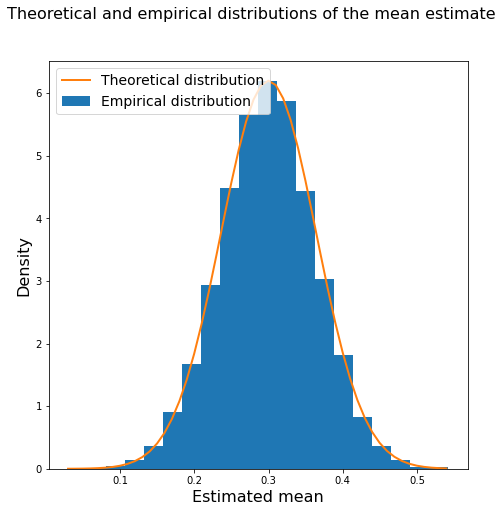

In [6]:
Nsim = 10000
estimates = np.zeros(Nsim)

for i in range(Nsim):
    noise1 = errors_sigma*np.random.randn(N)
    y1 =  signal_pl + noise1  
    hat_mu1 = np.sum(y1/errors_sigma**2) / np.sum(1/errors_sigma**2)
    estimates[i] = hat_mu1
    
absc = np.arange(np.min(estimates), np.max(estimates),0.01)    
    
#Compute the theoretical distribution    
theoretical_var = 1/np.sum(1/errors_sigma**2)
theoretical_dist = 1/np.sqrt(2*np.pi*theoretical_var) * np.exp(-0.5*(absc-mu)**2/ theoretical_var)

print('Empirical Values')
print('----------------')
print('Empirical value of mean is ', np.mean(estimates))
print('Empirical value of uncertainty on mean is ', np.std(estimates))
print('                ')
print('Theoretical Values')
print('------------------')
print('Theoretical estimated value of mean is ', str(hat_mu))
print('Theoretical uncertainty on the mean is ', str(np.sqrt(theoretical_var)))

plt.figure(figsize=(7.5,7.5))
plt.hist(estimates, density=True, label = 'Empirical distribution', bins=20)
plt.plot(absc, theoretical_dist,linewidth = 2, label = 'Theoretical distribution')
plt.xlabel('Estimated mean', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle('Theoretical and empirical distributions of the mean estimate', fontsize=16)
plt.legend( fontsize=14)

---
### Questions 


#### Question 1.1:     show that the estimate of the mean defined above is a particular case of linear least square

#### Question 1.2: show that the estimate of the mean defined above is a particular case of maximum likelihood estimation

**Answers**

Since the given model is linear ($f_i = \mu + \epsilon_i$) and the distribution of noise ($\epsilon_i$) is assumed to be a Gaussian, the maximum likelihood esimate of parameterse will reduce to their linear least square estimates.

---
#### Question 2: linear least square

Let us now suppose that you have measurements at times $t$ and the model is $f(\alpha, \mu) = \alpha t + \mu$, and you want to estimate jointly $\alpha$ and $\mu$. Find the expression of the least square estimate of the couple ($\alpha, \mu$) and its covariance matrix

Text(0.5, 0.98, 'Measurements')

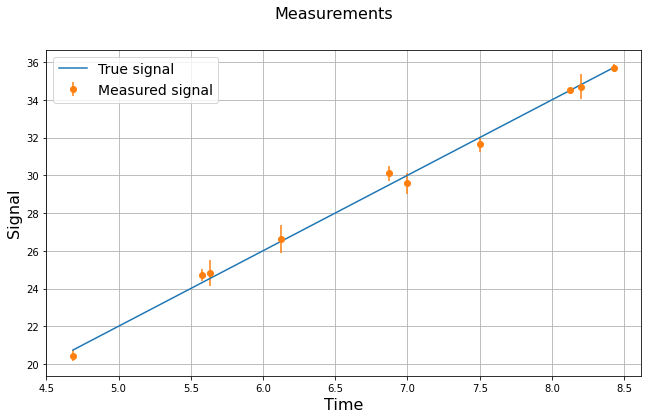

In [7]:
N = 10
mean_error = 1 #Mean value of the error bars
mu = 2
alpha = 4
errors_sigma = mean_error*np.random.random(N)#np.random.chisquare(4,size=N)/4 #Generage values of the error bars

tt = np.sort(np.random.rand(N))*10

noise = errors_sigma*np.random.randn(N)
signal_t = mu + alpha*tt
y_t =  signal_t + noise #Generated data

#Plot the mock data
abscissa = tt
plt.figure(figsize=(16/1.5,9/1.5))
plt.plot(abscissa, signal_t, label='True signal')
plt.errorbar(abscissa, y_t, yerr=errors_sigma, label='Measured signal',fmt='o')
plt.legend(fontsize = 14)
plt.grid()
plt.xlabel('Time', fontsize=16)
plt.ylabel('Signal', fontsize=16)
plt.suptitle('Measurements', fontsize=16)

**Answer**
Here the given model is,

$$f(\hat{\theta}_i) = y_i = \alpha t_i + \mu + \epsilon_i$$

where, $\hat{\theta} = (\alpha, \mu)$. And $t_i$ is the given timeseries. In this case as well the errors in the observations are assumed to Gaussian. That means that we can estimate the parameters of our model using the linear least square.

We can write given data as,


\begin{equation*}
\begin{pmatrix}
    y_1 \\
    \vdots \\
    y_n
\end{pmatrix}
=
\begin{pmatrix}
    t_1 & 1 \\
    \vdots & \vdots \\
    t_n & 1
\end{pmatrix}
 \begin{pmatrix}
     \alpha \\
     \mu
  \end{pmatrix}
+
\epsilon_i
\end{equation*}

where,

$$ A = \begin{pmatrix} t_1 & 1 \\ \vdots & \vdots \\ t_n & 1 \end{pmatrix}$$

Now, we can find the covariance between the parameters as follows,

\begin{equation*}
    \begin{split}
        cov(\hat{\alpha}, \hat{\mu}) = (A^T V^{-1} A)^{-1} &= \left[ \begin{pmatrix} t_1 & \cdots & t_{10} \\ 1 & \cdots & 1 \end{pmatrix} \begin{pmatrix} 1/\sigma_1^2 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & 1/\sigma_{10}^2 \end{pmatrix} \begin{pmatrix} t_1 & 1 \\ \vdots & \vdots \\ t_{10} & 1 \end{pmatrix} \right] ^{-1} \\
        &= \left[ \begin{pmatrix} t_1 & \cdots & t_{10} \\ 1 & \cdots & 1 \end{pmatrix} \begin{pmatrix} \frac{t_1}{\sigma_1^2} & \frac{1}{\sigma_1^2} \\ \vdots & \vdots \\ \frac{t_{10}}{\sigma_{10}^2} & \frac{1}{\sigma_{10}^2} \end{pmatrix} \right] ^ {-1} \\
        &= \begin{pmatrix} \sum_{i=1}^{10} \frac{t_i^2}{\sigma_i^2} & \sum_{i=1}^{10} \frac{t_i}{\sigma_i^2} \\ \sum_{i=1}^{10} \frac{t_i}{\sigma_i^2} & \sum_{i=1}^{10} \frac{1}{\sigma_i^2} \end{pmatrix} ^ {-1}
    \end{split}
\end{equation*}

Further,

\begin{equation*}
    \begin{split}
        A^T V^{-1} y &= \begin{pmatrix} t_1 & \cdots & t_{10} \\ 1 & \cdots & 1 \end{pmatrix} \begin{pmatrix} 1/\sigma_1^2 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & 1/\sigma_{10}^2 \end{pmatrix} \begin{pmatrix} y_1 \\ \vdots \\ y_{10} \end{pmatrix} \\
        &= \begin{pmatrix} t_1 & \cdots & t_{10} \\ 1 & \cdots & 1 \end{pmatrix} \begin{pmatrix} \frac{y_1}{\sigma_1^2} \\ \vdots \\ \frac{y_{10}}{\sigma_{10}^2} \end{pmatrix} \\
        &= \begin{pmatrix} \sum_{i=1}^{10} \frac{t_i y_i}{\sigma_i^2} \\ \sum_{i=1}^{10} \frac{y_i}{\sigma_i^2} \end{pmatrix}
    \end{split}
\end{equation*}

Putting all of these together,

\begin{equation*}
    \hat{\theta} = \begin{pmatrix} \hat{\alpha} \\ \hat{\mu} \end{pmatrix} = \begin{pmatrix} \sum_{i=1}^{10} \frac{t_i^2}{\sigma_i^2} & \sum_{i=1}^{10} \frac{t_i}{\sigma_i^2} \\ \sum_{i=1}^{10} \frac{t_i}{\sigma_i^2} & \sum_{i=1}^{10} \frac{1}{\sigma_i^2} \end{pmatrix} ^ {-1} \begin{pmatrix} \sum_{i=1}^{10} \frac{t_i y_i}{\sigma_i^2} \\ \sum_{i=1}^{10} \frac{y_i}{\sigma_i^2} \end{pmatrix}
\end{equation*}

Estimated value of $\alpha$ is 3.998493874938873+/-0.004840323684569421
Estimated value of $\mu$ is 2.0300180671306407+/-0.28792713613478305


Text(0.5, 0.98, 'Measurements')

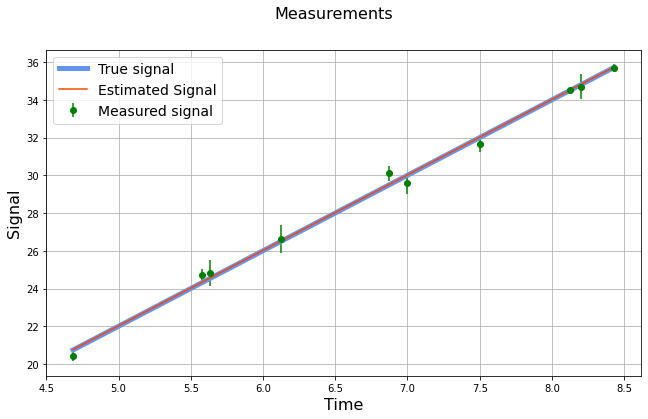

In [8]:
cov1 = np.array([[np.sum(tt**2/errors_sigma**2), np.sum(tt/errors_sigma**2)],
                [np.sum(tt/errors_sigma**2), np.sum(1/errors_sigma**2)]])
cov = np.linalg.inv(cov1)
BB = np.array([[np.sum(tt*y_t/errors_sigma**2)],[np.sum(y_t/errors_sigma**2)]])
theta = cov.dot(BB)

signal_esti = theta[0]*tt + theta[1]


print(r'Estimated value of $\alpha$ is ' + str(theta[0][0]) + '+/-' + str(cov[0][0]))
print(r'Estimated value of $\mu$ is ' + str(theta[1][0]) + '+/-' + str(cov[1][1]))

plt.figure(figsize=(16/1.5,9/1.5))
plt.plot(tt, signal_t,color='cornflowerblue', lw=5, label='True signal')
plt.plot(tt, signal_esti, color='orangered', label='Estimated Signal')
plt.errorbar(tt, y_t, yerr=errors_sigma, color='green', label='Measured signal',fmt='o')
plt.grid()
plt.legend(fontsize = 14)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Signal', fontsize=16)
plt.suptitle('Measurements', fontsize=16)

Now, we would like to compare theoretical and empirical distribution of $\alpha$ and $\mu$

Text(0.5, 0.98, 'Theoretical and empirical distributions of the estimate of parameters')

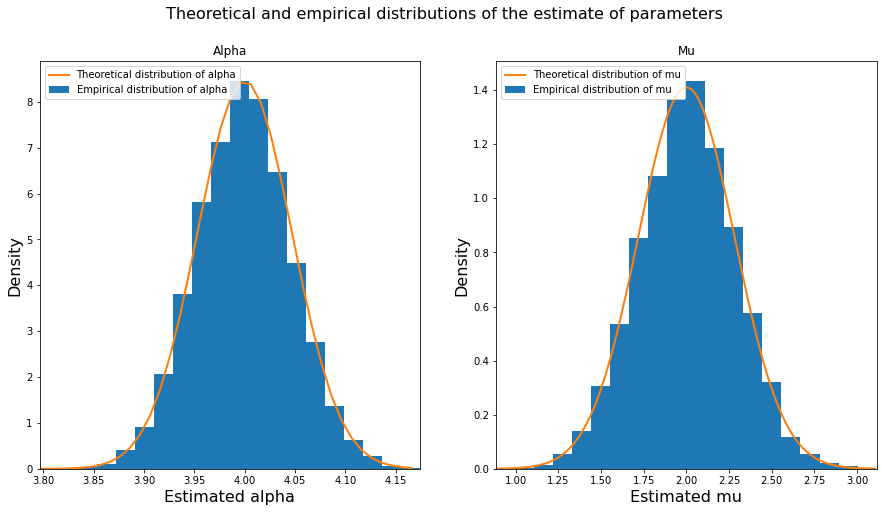

In [9]:
Nsim = 10000
estimates_alpha = np.zeros(Nsim)
estimates_mu = np.zeros(Nsim)
errors_sigma = mean_error*np.random.random(N)#np.random.chisquare(4,size=N)/4 #Generage values of the error bars
t1 = np.sort(np.random.rand(N))*10
signal1 = mu + alpha*t1

for i in range(Nsim):
    noise11 = errors_sigma*np.random.randn(N)
    y11 =  signal1 + noise11
    cov1 = np.array([[np.sum(t1**2/errors_sigma**2), np.sum(t1/errors_sigma**2)],
                [np.sum(t1/errors_sigma**2), np.sum(1/errors_sigma**2)]])
    cov = np.linalg.inv(cov1)
    BB = np.array([[np.sum(t1*y11/errors_sigma**2)],[np.sum(y11/errors_sigma**2)]])
    theta = cov.dot(BB)
    estimates_alpha[i] = theta[0][0]
    estimates_mu[i] = theta[1][0]
    
absc_a = np.arange(np.min(estimates_alpha), np.max(estimates_alpha),0.01)
absc_m = np.arange(np.min(estimates_mu), np.max(estimates_mu),0.01)
    
#Compute the theoretical distribution    
cov11 = np.array([[np.sum(t1**2/errors_sigma**2), np.sum(t1/errors_sigma**2)],
                [np.sum(t1/errors_sigma**2), np.sum(1/errors_sigma**2)]])
theo_cov = np.linalg.inv(cov11)

theoretical_var_alpha = theo_cov[0][0]
theoretical_var_mu = theo_cov[1][1]

theoretical_dist_alpha = 1/np.sqrt(2*np.pi*theoretical_var_alpha) * np.exp(-0.5*(absc_a-alpha)**2/theoretical_var_alpha)
theoretical_dist_mu = 1/np.sqrt(2*np.pi*theoretical_var_mu) * np.exp(-0.5*(absc_m-mu)**2/ theoretical_var_mu)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                                    figsize=(15, 7.5))

ax0.set_title('Alpha')
ax0.hist(estimates_alpha, density=True, label = 'Empirical distribution of alpha', bins=20)
ax0.plot(absc_a, theoretical_dist_alpha, linewidth = 2, label = 'Theoretical distribution of alpha')
ax0.set_xlim([np.min(estimates_alpha), np.max(estimates_alpha)])
ax0.set_xlabel('Estimated alpha', fontsize=16)
ax0.set_ylabel('Density', fontsize=16)
ax0.legend()

ax1.set_title('Mu')
ax1.hist(estimates_mu, density=True, label = 'Empirical distribution of mu', bins=20)
ax1.plot(absc_m, theoretical_dist_mu, linewidth = 2, label = 'Theoretical distribution of mu')
ax1.set_xlim([np.min(estimates_mu), np.max(estimates_mu)])
ax1.set_xlabel('Estimated mu', fontsize=16)
ax1.set_ylabel('Density', fontsize=16)
plt.legend()

fig.suptitle('Theoretical and empirical distributions of the estimate of parameters', fontsize=16)

---
#### Question 3: example of maximum likelihood
##### Set up
When we have nominal errors on the measurements $\sigma_k$, that means we assume that the measurement $k$ is of the form $$y_k = y^0_k + \epsilon_k$$ where $y^0_k$ is the true value and $\epsilon_k$ is a Gaussian variable of mean 0 and variance $\sigma_k^2$.

However, in general the true error on the measurement is not $\sigma_k^2$, but higher. some astrophysical process, or unaccounted error from the instruments are such that a more correct model for the measurement $k$ would be 
$$y_k = y^0_k + \epsilon_k + \epsilon $$
where $\epsilon$ is a Gaussian variable of mean 0 and unknown variance $\sigma^2$ independent from $\epsilon_k$.

We now want to estimate this unknown variance along with the model parameters. To do so, we will use the maximum likelihood estimate. In our case, the likelihood is 

$$ p(y|\mu, \alpha, \sigma) = \frac{1}{ \sqrt{2\pi}^N \prod\limits_{k=1}^N (\sigma_k^2 + \sigma^2) }  e^{-\frac{1}{2} \sum\limits_{k=1}^N \frac{(y_k - \mu - \alpha t_k - \epsilon)^2}{\sigma_k^2 + \sigma^2} } = \frac{1}{ \sqrt{2\pi}^N \prod\limits_{k=1}^N (\sigma_k^2 + \sigma^2) }  e^{-\frac{1}{2} \sum\limits_{k=1}^N \frac{(y_k - \mu - \alpha t_k)^2}{\sigma_k^2 + \sigma^2} }$$

Since, $\epsilon$ is assumed to be a Gaussian variable of mean 0 and unknown variance $\sigma^2$

And the maximum likelihood estimate of $\mu, \alpha, \sigma$ is 
$$\hat{\mu}, \hat{\alpha}, \hat{\sigma}  = \arg \max\limits_{\mu, \alpha, \sigma } p(y|\mu, \alpha, \sigma) $$



Below, we provide a function that takes in input the data and returns the maximum likelihood estimate 


In [10]:
#Define the log likelihood function, that is to be maximized
def minus_loglikelihood(x):
    global tt, y_n1, errors_sigma
    mu = x[0]
    alpha = x[1]
    sigma = x[2]
    model = mu + tt*alpha
    v = (y_n1-model)/(errors_sigma**2 + sigma**2)
    N = len(tt)
    minus_loglike = N*0.5*np.log(2*np.pi) + 0.5*np.sum(np.log(errors_sigma**2 + sigma**2)) + \
                    0.5*np.dot(v,v)
    return(minus_loglike)

In [11]:
#Define a function that takes in input the measurement times, 
#the model and an initial condition for the fit, and that outputs the estimate of the parameters mu, alpha, sigma
def estim_parameters(t,y,x_init):
    obj = minimize(minus_loglikelihood,x_init, method = 'L-BFGS-B')
    sol = obj.x
    return(sol)
#x[0], x[1] and x[2] are the maximium likelihoof estimates of mu, alpha, sigma

##### Remark: When using a numerical minimization, it is critical to check convergence

Let us check on an example

In [12]:
#Define the initial condition of the fit
x_init = [1, 1, 1]

y_n1 = y_t

res = minimize(minus_loglikelihood, x_init, method='L-BFGS-B', tol=1e-6)
#print(res)
#Check the minimization algorithm has converged
print('Convergence is ensured:', res.success)

#Access the value of the argument that minimizes the function 
print('mu, alpha, sigma estimate is ', res.x)


Convergence is ensured: True
mu, alpha, sigma estimate is  [2.73758866 3.91112184 0.34279873]


#### Question 3.1: Compute the empirical distribution of the estimates of $\mu, \alpha, \sigma$ using the function estim_parameters

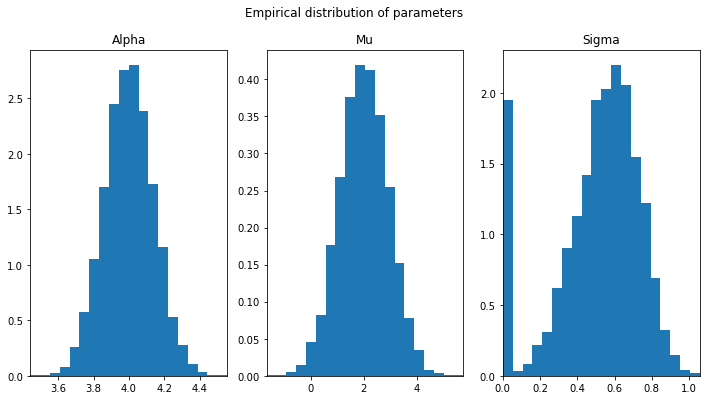

In [13]:
estim_mu = np.zeros(Nsim)
estim_al = np.zeros(Nsim)
estim_sig = np.zeros(Nsim)

for i in range(Nsim):
    noise11 = errors_sigma*np.random.randn(N)
    y_n1 =  signal_t + noise11
    theta2 = estim_parameters(tt, y_n1, x_init=[1,1,1])
    estim_mu[i] = theta2[0]
    estim_al[i] = theta2[1]
    estim_sig[i] = theta2[2]
    
estim_sig = np.abs(estim_sig)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3,
                                    figsize=(12, 6))

ax0.set_title('Alpha')
ax0.hist(estim_al, bins=20, density=True)
ax0.set_xlim([np.min(estim_al), np.max(estim_al)])

ax1.set_title('Mu')
ax1.hist(estim_mu, bins=20, density=True)
ax1.set_xlim([np.min(estim_mu), np.max(estim_mu)])

ax2.set_title('Sigma')
ax2.hist(estim_sig, bins=20, density=True)
ax2.set_xlim([np.min(estim_sig), np.max(estim_sig)])

fig.suptitle('Empirical distribution of parameters')
plt.show()

#### Question 3.2: compute the bias, variance and correlations of the estimates of $\mu, \alpha, \sigma$

In [14]:
sigma = 1
bias_mu = np.mean(estim_mu) - mu
bias_al = np.mean(estim_al) - alpha
bias_sig = np.mean(estim_sig) - sigma

print('For mu')
print('Bias in the measurement of mu is ', bias_mu)
print('Variance in the measurememtn of mu is ', np.var(estim_mu))
print('')
print('For alpha')
print('Bias in the measurement of alpha is ', bias_al)
print('Variance in the measurement of alpha is ', np.var(estim_al))
print('')
print('For sigma')
print('Bias in the measurement of sigma is ', bias_sig)
print('Variance in the measurement of sigma is ', np.var(estim_sig))

For mu
Bias in the measurement of mu is  0.001232579723158267
Variance in the measurememtn of mu is  0.8421881966538133

For alpha
Bias in the measurement of alpha is  -0.00017562737420506735
Variance in the measurement of alpha is  0.01933008738284447

For sigma
Bias in the measurement of sigma is  -0.49212100184907503
Variance in the measurement of sigma is  0.05352509642209564


#### Question 3.3: compare the empirical distribution of the estimates $\hat{\mu}, \hat{\alpha}, \hat{\sigma}$, and the asymptotic expression of errors for the maximum likelihood.  
Recall that the asymptotic estimate of the covariance is a square matrix $C$ which has the dimension of the number of parameters. Defining 
$$ C_{ij} = [I^{-1}]_{ij}$$ 
Where $I$ is the Fisher information matrix, 
$$I_{ij} = - \mathbb{E}\left\{ \frac{\partial \log p(y|\theta)}{\partial \theta_i \partial \theta_j} \right\}(\theta = \hat{\theta})$$



The given likelihood is,

$$ p(y|\mu, \alpha, \sigma) = \frac{1}{ \sqrt{2\pi}^N \prod\limits_{k=1}^N (\sigma_k^2 + \sigma^2) }  e^{-\frac{1}{2} \sum\limits_{k=1}^N \frac{(y_k - \mu - \alpha t_k)^2}{\sigma_k^2 + \sigma^2} }$$

Taking logarithm both side of the equation,

$$\log p(y|\mu, \alpha, \sigma) = -\frac{N}{2} \log 2\pi - \sum_{k=1}^{N} \log \left( \sigma_k^2 + \sigma^2 \right) - \frac{1}{2} \sum_{k=1}^{N} \frac{(y_k - \mu - \alpha t_k)^2}{\sigma_k^2 + \sigma^2} $$

Now, we want to calculate various partial derivatives of above equation. Below, we only present the results since the procedure is typical.

$$\frac{\partial^2 \log p}{\partial \mu^2} = - \sum_{i=1}^{N} \frac{1}{\sigma_k^2 + \sigma^2}$$

$$\frac{\partial^2 \log p}{\partial \mu \partial \alpha} = \frac{\partial^2 \log p}{\partial \alpha \partial \mu} = - \sum_{k=1}^{N} \frac{t_k}{\sigma_k^2 + \sigma^2} $$

$$\frac{\partial^2 \log p}{\partial \mu \partial \sigma} = \frac{\partial^2 \log p}{\partial \sigma \partial \mu} = -2\sigma \sum_{k=1}^{N} \frac{y_k - \mu - \alpha t_k}{(\sigma_k^2 + \sigma^2)^2} $$

$$\frac{\partial^2 \log p}{\partial \alpha^2} = - \sum_{k=1}^{N} \frac{t_k^2}{\sigma_k^2 + \sigma^2}$$

$$\frac{\partial^2 \log p}{\partial \alpha \partial \sigma} = \frac{\partial^2 \log p}{\partial \sigma \partial \alpha} = -2 \sigma \sum_{k=1}^{N} \frac{t_k(y_k - \mu - \alpha t_k)}{(\sigma_k^2 + \sigma^2)^2}$$

$$\frac{\partial^2 \log p}{\partial \sigma^2} = \sum_{k=1}^{N} \frac{4 \sigma^2}{(\sigma^2 + \sigma_k^2)^2} - \sum_{k=1}^{N} \frac{2}{\sigma^2 + \sigma_k^2} + \sum_{k=1}^{N} \left( \frac{y_k - \mu - \alpha t_k}{\sigma_k^2 + \sigma^2} \right)^2 - 4\sigma^2 \sum_{k=1}^{N} \frac{(y_k - \mu - \alpha t_k)^2}{(\sigma_k^2 + \sigma^2)^3} $$

Using all of these forms, we can write matrix *I* as ($1 \sim \mu$, $2 \sim \alpha$, $3 \sim \sigma$),

\begin{equation*}
\begin{split}
I &= - 
\begin{pmatrix}
\frac{\partial^2 \log p}{\partial \mu^2} & \frac{\partial^2 \log p}{\partial \mu \partial \alpha} & \frac{\partial^2 \log p}{\partial \mu \partial \sigma} \\
\frac{\partial^2 \log p}{\partial \alpha \partial \mu} & \frac{\partial^2 \log p}{\partial \alpha^2} & \frac{\partial^2 \log p}{\partial \alpha \partial \sigma} \\
\frac{\partial^2 \log p}{\partial \sigma \partial \mu} & \frac{\partial^2 \log p}{\partial \sigma \partial \alpha} & \frac{\partial^2 \log p}{\partial \sigma^2}
\end{pmatrix} \\
\end{split}
\end{equation*}

\begin{equation*}
\begin{split}
\Rightarrow I &= -
\begin{pmatrix}
-\sum_{k=1}^{N} \frac{1}{\sigma_k^2 + \sigma^2} & -\sum_{k=1}^{N} \frac{t_k}{\sigma_k^2 + \sigma^2} & -2\sigma \sum_{k=1}^{N} \frac{y_k - \mu - \alpha t_k}{(\sigma_k^2 + \sigma^2)^2} \\
-\sum_{k=1}^{N} \frac{t_k}{\sigma_k^2 + \sigma^2} & -\sum_{k=1}^{N} \frac{t_k^2}{\sigma_k^2 + \sigma^2} & -2 \sigma \sum_{k=1}^{N} \frac{t_k(y_k - \mu - \alpha t_k)}{(\sigma_k^2 + \sigma^2)^2} \\
-2\sigma \sum_{k=1}^{N} \frac{y_k - \mu - \alpha t_k}{(\sigma_k^2 + \sigma^2)^2} & -2 \sigma \sum_{k=1}^{N} \frac{t_k(y_k - \mu - \alpha t_k)}{(\sigma_k^2 + \sigma^2)^2} & \sum_{k=1}^{N} \frac{4 \sigma^2}{(\sigma^2 + \sigma_k^2)^2} - \sum_{k=1}^{N} \frac{2}{\sigma^2 + \sigma_k^2} + \sum_{k=1}^{N} \left( \frac{y_k - \mu - \alpha t_k}{\sigma_k^2 + \sigma^2} \right)^2 - 4\sigma^2 \sum_{k=1}^{N} \frac{(y_k - \mu - \alpha t_k)^2}{(\sigma_k^2 + \sigma^2)^3}
\end{pmatrix}
\end{split}
\end{equation*}

We will use numpy.mean to calculate the expectations of various values in above equation and then we well use another numpy function numpy.linalg.inv to find the inverse of the matrix which would be the required covariance matrix.

In [15]:
theta_1 = np.array([np.mean(estim_mu), np.mean(estim_al), np.mean(estim_sig)])
#theta_1[0], theta_1[1] and theta_1[2] are the maximium likelihoof estimates of mu, alpha, sigma
mo = y_t - theta_1[0] - theta_1[1]*tt
sigg = errors_sigma**2 + theta_1[2]**2

# Defining matrix I

I11 = -np.sum(1/sigg)
I12 = -np.sum(tt/sigg)
I13 = -2*theta_1[2]*np.sum(mo/sigg**2)
I21 = I12
I22 = -np.sum(tt**2/sigg)
I23 = -2*theta_1[2]*np.sum(tt*mo/sigg**2)
I31 = I13
I32 = I23
I33 = np.sum(4*theta_1[2]*theta_1[2]/sigg**2) - np.sum(2/sigg) + np.sum(mo**2/sigg**2) \
    - 4*theta_1[2]*theta_1[2]*np.sum(mo**2/sigg**3)

II = -1*np.array([[I11, I12, I13],[I21, I22, I23],[I31, I32, I33]])

covI = np.linalg.inv(II)
print(covI)

[[ 2.1357333  -0.30174815 -0.24860193]
 [-0.30174815  0.04414274  0.03092565]
 [-0.24860193  0.03092565  0.20120744]]
